In [2]:
import pydub 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

In [4]:
audio_file = './car-acceleration-inside-car-7087.mp3'
sr, x = read(audio_file)

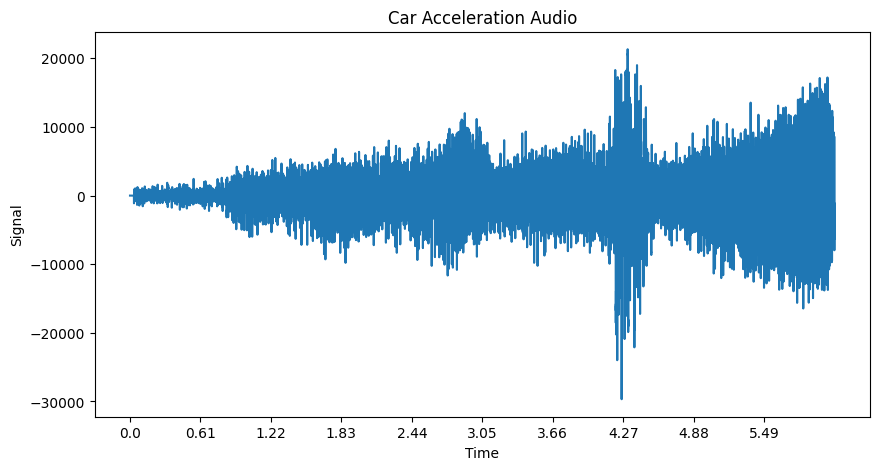

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,5))
stop=200000
x_ticks=np.arange(0, stop, .10*stop)
x_ticklabels=np.round(x_ticks/2**15,2)
ax.plot(x[:stop,0])
ax.set_title("Car Acceleration Audio")
ax.set_xlabel("Time")
ax.set_ylabel("Signal")
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)